In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1 = pd.read_csv("C:/Users/Harsh/OneDrive/Desktop/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df2 = df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()

In [8]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [10]:
def isFloat(x):
    try:
        float(x)
    except:
         return False
    return True


In [11]:
df3[df3['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
df3[~df3['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135


In [13]:
def convertRange(x):
    tokens = x.split('-')
    
    if(len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df4 = df3.copy()

In [15]:
df4['total_sqft'] = df4['total_sqft'].apply(convertRange)

In [18]:
df4.loc[188]

location      KR Puram
size             2 BHK
total_sqft      1277.5
bath               2.0
price             56.8
Name: 188, dtype: object

In [19]:
df5 = df4.copy()

In [20]:
df5['pricePerSqft'] = df5['price'] * 100000 / df5['total_sqft']

In [21]:
df5.head()


,location,size,total_sqft,bath,price,pricePerSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [22]:
df5.location = df5.location.apply(lambda x: x.strip())

In [23]:
locationsStats = df5.groupby('location')['location'].agg('count')

In [24]:
locationsStats.sort_values(ascending = False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
len(locationsStats[locationsStats < 10])

1039

In [33]:
locationLessThan10 = locationsStats[locationsStats <= 10]

In [34]:
df5.location = df5.location.apply(lambda x: 'other' if x in locationLessThan10 else x)

In [35]:
df5.groupby('location')['location'].agg('count')

location
1st Block Jayanagar            14
1st Phase JP Nagar             25
2nd Phase Judicial Layout      11
2nd Stage Nagarbhavi           24
5th Block Hbr Layout           12
                             ... 
Yelahanka                     210
Yelahanka New Town             41
Yelenahalli                    13
Yeshwanthpur                   85
other                        2881
Name: location, Length: 242, dtype: int64

In [39]:
df5[df5.total_sqft / df5.bath < 300].head()

,location,size,total_sqft,bath,price,pricePerSqft
9,other,6 Bedroom,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,33333.333333
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,20000.000000
84,EPIP Zone,3 BHK,1499.0,5.0,102.0,6804.536358


In [41]:
df6 = df5[~(df5.total_sqft / df5.bath < 300)]

In [42]:
df6.head()

,location,size,total_sqft,bath,price,pricePerSqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4250.000000


In [43]:
df6.pricePerSqft.describe()

count     12563.000000
mean       6335.081938
std        4166.086230
min         267.829813
25%        4213.906002
50%        5300.000000
75%        6956.521739
max      176470.588235
Name: pricePerSqft, dtype: float64

In [48]:
def removePpsOutliers(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.pricePerSqft)
        st = np.std(subdf.pricePerSqft)
        
        reduced_df = subdf[(subdf.pricePerSqft > (m-st)) & (subdf.pricePerSqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    
    return df_out

In [49]:
df7 = removePpsOutliers(df6)

In [54]:
def plotScatter(df,location):
    bhk2 = df[(df.location == location) & (df.bath == 2)]
    bhk3 = df[(df.location == location) & (df.bath == 3)]
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'Blue', label = '2 BHK')
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'Red', label = '3 BHk')
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.legend()
    plt.title(location)
    plt.show()
    

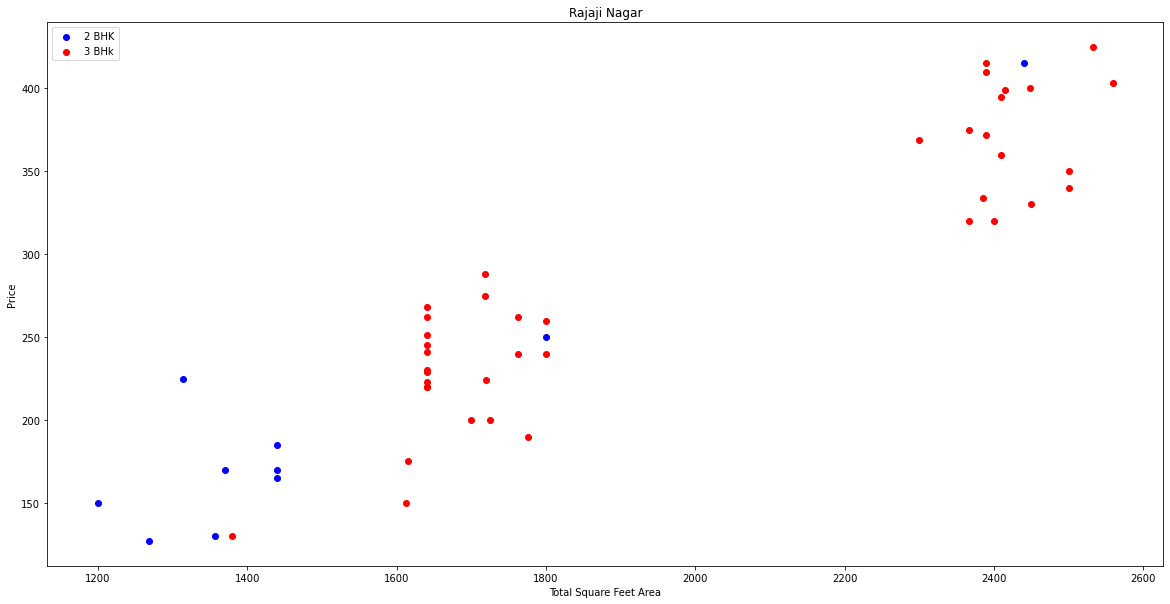

In [55]:
plotScatter(df7,'Rajaji Nagar')

In [58]:
def removeOutliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby('bath'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.pricePerSqft),
                'std':np.std(bhk_df.pricePerSqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bath'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.pricePerSqft < (stats['mean'])].index.values)
            
    return df.drop(exclude_indices, axis='index')

In [59]:
df8 = removeOutliers(df7)

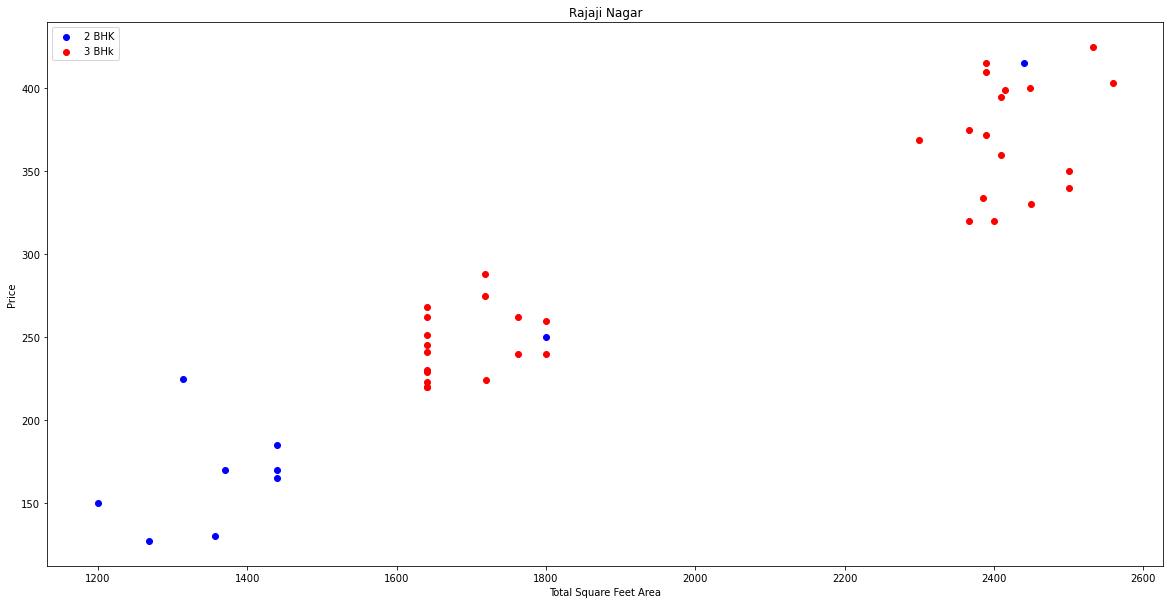

In [60]:
plotScatter(df8,"Rajaji Nagar")

In [63]:
df10 = df8.drop(['size','pricePerSqft'], axis = 'columns')
df10

,location,total_sqft,bath,price
0,1st Block Jayanagar,2850.0,4.0,428.0
1,1st Block Jayanagar,1630.0,3.0,194.0
2,1st Block Jayanagar,1875.0,2.0,235.0
3,1st Block Jayanagar,1200.0,2.0,130.0
4,1st Block Jayanagar,1235.0,2.0,148.0
...,...,...,...,...
10321,other,1200.0,2.0,70.0
10322,other,1800.0,1.0,200.0
10325,other,1353.0,2.0,110.0
10326,other,812.0,1.0,26.0


In [64]:
dummies = pd.get_dummies(df10.location)

In [65]:
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df11 = pd.concat([df10,dummies.drop('other', axis = 'columns')],axis = 'columns')
df11.head(4)

,location,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df12 = df11.drop('location',axis = 'columns')

In [68]:
df12.head()

,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X = df12.drop('price',axis = 'columns')
y = df12.price

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [71]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8738113296437251

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.79156602, 0.86014552, 0.78095418, 0.8897211 , 0.80744824])

In [73]:
def predictPrice(location, sqft, bath):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [74]:
predictPrice('Indira Nagar',1000,2)

174.61938325437052